In [1]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import numpy.linalg as la
import random

(CVXPY) Jan 21 04:33:31 PM: Encountered unexpected exception importing solver MOSEK:
AttributeError("module 'mosek' has no attribute 'conetype'")


In [2]:
def create_regular_bipartite_graph(n1, n2, d1, d2):
    if n1 * d1 != n2 * d2:
        raise ValueError("No d-regular bipartite graph possible with these parameters")

    left_nodes = list(range(n1))
    right_nodes = list(range(n1, n1 + n2))

    B = nx.Graph()
    B.add_nodes_from(left_nodes, bipartite=0)
    B.add_nodes_from(right_nodes, bipartite=1)

    edges = []
    left_degrees = {node: 0 for node in left_nodes}
    print(left_degrees)
    right_degrees = {node: 0 for node in right_nodes}

    # Shuffle the nodes to randomize connections
    random.shuffle(left_nodes)
    random.shuffle(right_nodes)

    # Create a list of edge candidates
    edge_candidates = [(u, v) for u in left_nodes for v in right_nodes]
    print(len(edge_candidates))
    print(edge_candidates)
    random.shuffle(edge_candidates)
    print(edge_candidates)

    i = 1
    while(i):
        random.shuffle(edge_candidates)
        print('edge_candidtates', edge_candidates)
        for u, v in edge_candidates:
            print(u,v)
            if left_degrees[u] < d1 and right_degrees[v] < d2:
                B.add_edge(u, v)
                left_degrees[u] += 1
                right_degrees[v] += 1
                if all(left_degrees[node] == d1 for node in left_nodes) and all(right_degrees[node] == d2 for node in right_nodes):
                    break

        if (all(left_degrees[node] == d1 for node in left_nodes) and all(right_degrees[node] == d2 for node in right_nodes)):
           print('Huh')
           print(left_degrees)
           print(right_degrees)
           i = 0
        else:
          print('nope')
          print(B.edges())
          B.remove_edges_from(list(B.edges()))
          print(B.edges())
          left_degrees = {node: 0 for node in left_nodes}
          print(left_degrees)
          right_degrees = {node: 0 for node in right_nodes}


    return B

def incidence_matrix(B, n1, n2):
    matrix = np.zeros((n1, n2), dtype=int)
    print(B.edges())
    print(len(B.edges()))

    for u, v in B.edges():
        if u < n1:
            matrix[u, v - n1] = 1
        else:
            matrix[v, u - n1] = 1
    return matrix

n_1 = 20
n_2 = 40
d_1 = 6
d_2 = 3

B = create_regular_bipartite_graph(n_1, n_2, d_1, d_2)
A = incidence_matrix(B, n_1, n_2)

# print("Incidence Matrix:")
print(A)


{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0}
800
[(18, 42), (18, 41), (18, 39), (18, 54), (18, 36), (18, 40), (18, 57), (18, 52), (18, 58), (18, 47), (18, 53), (18, 51), (18, 59), (18, 26), (18, 45), (18, 32), (18, 37), (18, 50), (18, 56), (18, 43), (18, 31), (18, 21), (18, 35), (18, 48), (18, 30), (18, 38), (18, 23), (18, 46), (18, 20), (18, 22), (18, 55), (18, 44), (18, 29), (18, 25), (18, 49), (18, 34), (18, 27), (18, 28), (18, 33), (18, 24), (1, 42), (1, 41), (1, 39), (1, 54), (1, 36), (1, 40), (1, 57), (1, 52), (1, 58), (1, 47), (1, 53), (1, 51), (1, 59), (1, 26), (1, 45), (1, 32), (1, 37), (1, 50), (1, 56), (1, 43), (1, 31), (1, 21), (1, 35), (1, 48), (1, 30), (1, 38), (1, 23), (1, 46), (1, 20), (1, 22), (1, 55), (1, 44), (1, 29), (1, 25), (1, 49), (1, 34), (1, 27), (1, 28), (1, 33), (1, 24), (17, 42), (17, 41), (17, 39), (17, 54), (17, 36), (17, 40), (17, 57), (17, 52), (17, 58), (17, 47), (17,

In [5]:
la.matrix_rank(A)

20

In [6]:
A

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [7]:
# A= np.load('BIBD37105.npy')
# # A = A.T
# # q = 9
# # n_1 = q**2 +q+ 1
# # n_2 = q**2 +q+ 1
# # d_1 = q+1
# # d_2 = q+1
# # RR = A.T@A
# # lmd = RR[0,1]
# n_1 = A.shape[0]
# n_2 = A.shape[1]
# d_1 = 20
# d_2 = 10

# # inverted_matrix = np.where(A == 0, 1, 0)

In [8]:
A.shape

(20, 40)

In [9]:
np.random.seed(43)
mean = 0 # Desired mean
std_dev = 1  # Adjust as necessary for spread/variance
  # Number of random values

v1 = np.random.normal(loc=mean, scale=std_dev, size=(n_2, 1))
# # v2 = np.random.normal(loc=mean, scale=std_dev, size=(n_2, 1))
# v1 = np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5])
# v2 = np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5])      

In [10]:
v1 = np.reshape(v1, (v1.shape[0],1))
# v2 = np.reshape(v2, (v1.shape[0],1))

In [11]:
P = np.zeros((n_1,n_2))
Q = np.zeros((n_1,n_2))
for k in range(A.shape[0]):
    nz = np.nonzero(A[k,:])
    # print(nz)
    # print(v1[nz])
    P[k,:][nz] = np.reshape(v1[nz], (len(nz[0]),))/ (la.norm(v1[nz]))**2
    # Q[k,:][nz] = np.reshape(v2[nz], (len(nz[0]),))/ (la.norm(v1[nz]))**2
# E = np.vstack((P,Q))

In [12]:
U, S, Vt = np.linalg.svd(P)
v2 = np.reshape(Vt.T[:, -1], (Vt.T[:, -1].shape[0],1))
Q = np.zeros((n_1,n_2))
for k in range(A.shape[0]):
    nz = np.nonzero(A[k,:])
    # print(nz)
    # print(v1[nz])
    Q[k,:][nz] = np.reshape(v2[nz], (len(nz[0]),))/ (la.norm(v2[nz]))**2

In [13]:
E = np.vstack((P,Q))

In [14]:
print(P@v1)
print(P@v2)
print(Q@v1)
print(Q@v2)



[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[-2.60208521e-18]
 [-6.93889390e-18]
 [ 2.08166817e-17]
 [ 4.16333634e-17]
 [-2.77555756e-17]
 [ 5.55111512e-17]
 [-2.08166817e-17]
 [ 6.93889390e-18]
 [-1.38777878e-17]
 [ 2.42861287e-17]
 [ 3.46944695e-18]
 [ 4.33680869e-18]
 [ 6.93889390e-18]
 [-1.73472348e-17]
 [-5.89805982e-17]
 [-1.30104261e-17]
 [-4.59701721e-17]
 [-4.25041133e-17]
 [ 4.51028104e-17]
 [-6.24500451e-17]]
[[-6.66133815e-16]
 [-4.44089210e-16]
 [ 7.77156117e-16]
 [ 4.44089210e-16]
 [-2.22044605e-16]
 [ 2.66453526e-15]
 [-7.10542736e-15]
 [-1.11022302e-16]
 [-3.33066907e-16]
 [ 4.44089210e-16]
 [ 4.44089210e-16]
 [-1.52655666e-16]
 [ 4.44089210e-16]
 [-4.44089210e-16]
 [-4.21884749e-15]
 [-9.43689571e-16]
 [-2.19269047e-15]
 [-2.71015849e-14]
 [ 1.66533454e-15]
 [-3.44169138e-15]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

In [15]:
# U, S, Vt = np.linalg.svd(E)
# v3 = np.reshape(Vt.T[:, -1], (Vt.T[:, -1].shape[0],1))
# R = np.zeros((n_1,n_2))
# for k in range(A.shape[0]):
#     nz = np.nonzero(A[k,:])
#     # print(nz)
#     # print(v1[nz])
#     R[k,:][nz] = np.reshape(v3[nz], (len(nz[0]),))/ (la.norm(v3[nz]))**2

In [16]:
# E = np.vstack((P,Q, R))

In [17]:
v1= np.ones((n_2,1))
P1 = np.zeros((n_1,n_2))
# Q = np.zeros((n_1,n_2))
for k in range(A.shape[0]):
    nz = np.nonzero(A[k,:])
    # print(nz)
    # print(v1[nz])
    P1[k,:][nz] = np.reshape(v1[nz], (len(nz[0]),))/ (la.norm(v1[nz]))**2
    # Q[k,:][nz] = np.reshape(v2[nz], (len(nz[0]),))/ (la.norm(v1[nz]))**2

In [18]:
z = cp.Variable((n_2, 1), boolean=True)
v2 = 2*z-1
constraints = [P1@v2==0]
objective = cp.Minimize(10)
problem = cp.Problem(objective, constraints)
problem.solve()




if problem.status == cp.OPTIMAL:
  print("Okay")




#print("Optimal P:", P.value)
#print("Optimal P rounded:", P_rounded)0.

else:
  print("Problem is infeasible or unbounded")
v2 = v2.value
Q1 = np.zeros((n_1,n_2))
for k in range(A.shape[0]):
    nz = np.nonzero(A[k,:])
    # print(nz)
    # print(v1[nz])
    Q1[k,:][nz] = np.reshape(v2[nz], (len(nz[0]),))/ (la.norm(v2[nz]))**2


Okay


In [19]:
print(P1@v1)
print(P1@v2)
print(Q1@v1)
print(Q1@v2)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.55111512e-17]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.55111512e-17]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [20]:
E1 = np.vstack((P1,Q1))

In [21]:
E2 = np.vstack((A,A))


np.random.seed(42)
D1 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
D2 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
# D3 = np.diag(np.random.choice([1, -1], size= (n_2), p=[0.5, 0.5]))
E3 = np.vstack((A@D1,A@D2))

In [22]:
m = 2
F = np.kron(np.eye(m), np.ones((n_1,1)))
p = 15
n_w = E.shape[1]
n_p = n_1
s_list= np.linspace(0, ((.25*n_w)), p + 1, dtype=int)
# s_list = m*(s_list)
frac_stragglers = s_list/n_w
itr = 1000
ones = np.ones((n_1,1))

In [23]:
opt_err_array = np.zeros((len(s_list), itr))
opt_max = np.zeros(len(s_list))
opt_min = np.zeros(len(s_list))
opt_avg = np.zeros(len(s_list))

opt_err_array_1 = np.zeros((len(s_list), itr))
opt_max_1 = np.zeros(len(s_list))
opt_min_1 = np.zeros(len(s_list))
opt_avg_1 = np.zeros(len(s_list))

opt_err_array_2 = np.zeros((len(s_list), itr))
opt_max_2 = np.zeros(len(s_list))
opt_min_2 = np.zeros(len(s_list))
opt_avg_2 = np.zeros(len(s_list))


opt_err_array_3 = np.zeros((len(s_list), itr))
opt_max_3 = np.zeros(len(s_list))
opt_min_3 = np.zeros(len(s_list))
opt_avg_3 = np.zeros(len(s_list))


b_opt_err_array = np.zeros((len(s_list), itr))
b_opt_max = np.zeros(len(s_list))
b_opt_min = np.zeros(len(s_list))
b_opt_avg = np.zeros(len(s_list))


b_opt_err_array_1 = np.zeros((len(s_list), itr))
b_opt_max_1 = np.zeros(len(s_list))
b_opt_min_1 = np.zeros(len(s_list))
b_opt_avg_1 = np.zeros(len(s_list))

In [31]:
for i in range(len(s_list)):
    for j in range(itr):
            #print(i,j)
            np.random.seed(78+j)
            # random_non_stragglers = np.random.choice(np.arange(0, n_w), int(n_w-s_list[i]), replace=False)
            random_stragglers = np.random.choice(np.arange(0, int(n_w)), int(s_list[i]), replace=False)
            random_non_stragglers = np.setdiff1d(np.arange(0, n_w),random_stragglers)
            random_non_stragglers = np.sort(random_non_stragglers)
            E_F = E[:, random_non_stragglers]
            E_F_1 = E1[:, random_non_stragglers]
            E_F_2 = E2[:, random_non_stragglers]
            E_F_3 = E3[:, random_non_stragglers]
            P_F = P[:, random_non_stragglers]
            Q_F = Q[:, random_non_stragglers]
            P_F_1 = P1[:, random_non_stragglers]
            Q_F_1 = Q1[:, random_non_stragglers]
            # R_F = R[:, random_non_stragglers]
            # E_F_3 = E3[:, random_non_stragglers]
            #print(random_non_stragglers.shape)
            #print(random_non_stragglers)
            #print(E_F.shape)
            #print(E_F_1.shape)
            opt_err = 0
            opt_err_1 = 0
            opt_err_2 = 0
            opt_err_3 = 0

            for t in range(m):

                      a = F[:,t]
                      a = np.reshape(a, (m*n_p,1))

                      #print(a)
                      # print(a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a)



                      #opt_err = opt_err + a.T@a-a.T@E_F@ np.transpose(np.linalg.inv(np.transpose(E_F)@E_F))@E_F.T@a
                      # s1 = a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a
                      # opt_err = opt_err + a.conj().T@a-a.conj().T@E_F@ np.linalg.inv(E_F.conj().T@E_F).conj().T@E_F.conj().T@a
                      x, residuals, rank, s = np.linalg.lstsq(E_F, a, rcond=None)
                      opt_err = opt_err + np.linalg.norm(E_F@x-a,2)**2
                      x, residuals, rank, s = np.linalg.lstsq(E_F_1, a, rcond=None)
                      opt_err_1 = opt_err_1 + np.linalg.norm(E_F_1@x-a,2)**2
                      x, residuals, rank, s = np.linalg.lstsq(E_F_2, a, rcond=None)
                      opt_err_2 = opt_err_2 + np.linalg.norm(E_F_2@x-a,2)**2
                      x, residuals, rank, s = np.linalg.lstsq(E_F_3, a, rcond=None)
                      opt_err_3 = opt_err_3 + np.linalg.norm(E_F_3@x-a,2)**2
                      #print(residuals)
                      # opt_err_2 = opt_err_2 + a.conj().T@a-a.conj().T@E_F_2@ np.linalg.inv(E_F_2.conj().T@E_F_2).conj().T@E_F_2.conj().T@a

                      

                      # print('norm')
                      # print(np.linalg.norm(E_F.conj().T@a, 2))
                      # print('eig')
                      # print(np.sort(np.linalg.eigvals(E_F.T@E_F))[-1])
                      # print(((np.linalg.norm(E_F.conj().T@a, 2)**2 )/np.sort(np.linalg.eigvals(E_F.T@E_F))[-1]))
                      #print(np.sort(np.linalg.eigvals(E_F.T@E_F))[-1])
                      #opt_err_1 = opt_err_1 + a.conj().T@a-a.conj().T@E_F_1@ np.linalg.inv(E_F_1.conj().T@E_F_1).conj().T@E_F_1.conj().T@a
                      # x, residuals, rank, s = np.linalg.lstsq(E_F_2, a, rcond=None)
                      # print(residuals)
                      # # opt_err_2 = opt_err_2 + a.conj().T@a-a.conj().T@E_F_2@ np.linalg.inv(E_F_2.conj().T@E_F_2).conj().T@E_F_2.conj().T@a
                      # if residuals.size > 0:
                      #   opt_err_2 = opt_err_2 + residuals[0]
                      # else:
                      #     opt_err_2 = opt_err_2 + 0


                      # opt_err_3 = opt_err_3 + a.conj().T@a-a.conj().T@E_F_3@ np.linalg.inv(E_F_3.conj().T@E_F_3).conj().T@E_F_3.conj().T@a
                      #print(np.imag(opt_err))

            #print(opt_err.item())
            opt_err_array[i,j] = (np.real(opt_err))
            opt_err_array_1[i,j] = (np.real(opt_err_1))
            opt_err_array_2[i,j] = (np.real(opt_err_2))
            opt_err_array_3[i,j] = (np.real(opt_err_3))    
            # tilde_p = P_F.T@P_F + Q_F.T@Q_F 
            tilde_p = P_F.T@P_F + Q_F.T@Q_F 
            tilde_A =  np.diag(np.diag(tilde_p) + np.sum(np.abs(tilde_p), axis=1) - np.abs(np.diag(tilde_p)))
            
             
            b_opt_err_array[i,j] = m*n_p - ones.T@P_F@la.inv(tilde_A)@P_F.T@ones - ones.T@Q_F@la.inv(tilde_A)@Q_F.T@ones
            tilde_p = P_F_1.T@P_F_1 + Q_F_1.T@Q_F_1 
            tilde_A =  np.diag(np.diag(tilde_p) + np.sum(np.abs(tilde_p), axis=1) - np.abs(np.diag(tilde_p)))
            b_opt_err_array_1[i,j] = m*n_p - ones.T@P_F_1@la.inv(tilde_A)@P_F_1.T@ones - ones.T@Q_F_1@la.inv(tilde_A)@Q_F_1.T@ones
            # opt_err_array_1[i,j] = (np.real(opt_err_1.item()))
            # opt_err_array_2[i,j] = opt_err_2
            # opt_err_array_3[i,j] = (np.real(opt_err_3.item()))
            # ss = np.zeros(m)
            # prt = np.zeros(m)
            # for g in range(m):
            #     ss[g] = int(n_2/m)- ((random_non_stragglers >= g*(int(n_2/m))) & (random_non_stragglers < (g+1)*(int(n_2/m)) )).sum()
            #     prt[g] =((int(n_2/m) - ss[g])/(d_2 +lmd*( int(n_2/m) - ss[g] - 1)))
            # exp_err_array_3[i, :] = m*n_p - (d_2^2)*np.sum(prt)

            #print(ss)
            #print(ss.sum())
            #print(prt)



    opt_max[i] = np.max(opt_err_array[i,:])
    opt_min[i] = np.min(opt_err_array[i, :])
    opt_avg[i] = np.mean(opt_err_array[i, :])

    opt_max_1[i] = np.max(opt_err_array_1[i,:])
    opt_min_1[i] = np.min(opt_err_array_1[i, :])
    opt_avg_1[i] = np.mean(opt_err_array_1[i, :])
    
    opt_max_2[i] = np.max(opt_err_array_2[i,:])
    opt_min_2[i] = np.min(opt_err_array_2[i, :])
    opt_avg_2[i] = np.mean(opt_err_array_2[i, :])


    opt_avg_3[i] = np.mean(opt_err_array_3[i, :])
    
    b_opt_max[i] = np.max(b_opt_err_array[i,:])
    # b_opt_min[i] = np.min(b_opt_err_array[i, :])
    b_opt_avg[i] = np.mean(b_opt_err_array[i, :])
    b_opt_avg_1[i] = np.mean(b_opt_err_array_1[i, :])
    b_opt_max_1[i] = np.max(b_opt_err_array_1[i, :])






C:\Users\SMUNIM\AppData\Local\Temp\ipykernel_24744\4261698685.py:83: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt_err_array[i,j] = m*n_p - ones.T@P_F@la.inv(tilde_A)@P_F.T@ones - ones.T@Q_F@la.inv(tilde_A)@Q_F.T@ones
C:\Users\SMUNIM\AppData\Local\Temp\ipykernel_24744\4261698685.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt_err_array_1[i,j] = m*n_p - ones.T@P_F_1@la.inv(tilde_A)@P_F_1.T@ones - ones.T@Q_F_1@la.inv(tilde_A)@Q_F_1.T@ones


In [48]:
b_opt_max = np.zeros(len(s_list))

In [53]:
for i in range(b_opt_max.shape[0]):
 b_opt_max[i] = np.max(b_opt_err_array[i])


In [54]:
new_lower_bound = np.zeros((len(s_list)))
lb = np.zeros((m))
for i in range(len(s_list)):
  for j in range(m):
      lb[j] = np.floor((n_p*(s_list[i] + m - j -1))/(n_w*d_2)) * (j+1)
  new_lower_bound[i] = np.max(lb)


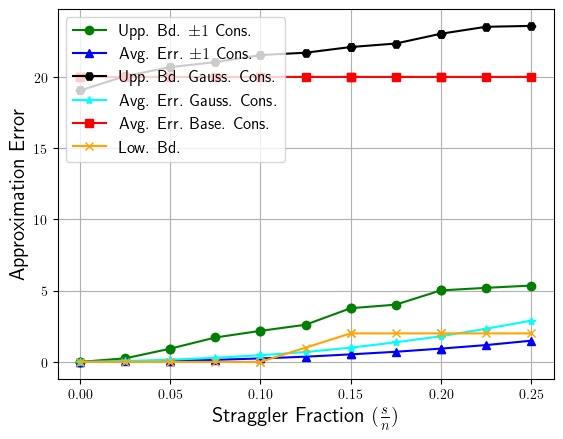

In [84]:

# # plt.plot(frac_stragglers, opt_avg_1, color = 'red', marker ='s', label = 'Error for Trivial Scheme')


plt.plot(frac_stragglers, b_opt_max_1, color = 'green', marker ='o', label = 'Upp. Bd. $\pm 1$ Cons.')
plt.plot(frac_stragglers, opt_avg_1, color = 'blue', marker ='^', label = 'Avg. Err. $\pm 1$ Cons.')
plt.plot(frac_stragglers, b_opt_max, color = 'black', marker ='H', label = 'Upp. Bd. Gauss. Cons.')
plt.plot(frac_stragglers, opt_avg, color = 'cyan', marker ='*', label = 'Avg. Err. Gauss. Cons.')
plt.plot(frac_stragglers, opt_avg_2, color = 'red', marker ='s', label = 'Avg. Err. Base. Cons.')
plt.plot(frac_stragglers, new_lower_bound, color = 'Orange', marker ='x', label = 'Low. Bd.')




plt.xlabel(r'Straggler Fraction $(\frac{s}{n})$', fontsize = 15)
plt.ylabel('Approximation Error', fontsize = 15)
plt.legend(fontsize='large',loc='upper left')
plt.rc('text', usetex=True)
plt.grid(True)
#plt.title('Approximation Error vs Fraction of Workers Straggling', fontsize = 14)
plt.savefig('ISIT_2025_plot_5(40, 20, 3, 6 bipartite)_v_2.pdf')

In [56]:
opt_min_2

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20.])

In [36]:
opt_avg_2

array([20.   , 20.   , 20.   , 20.   , 20.   , 20.   , 20.   , 20.   ,
       20.   , 20.   , 20.   , 20.   , 20.   , 20.   , 20.   , 20.001])

array([23.57977014, 23.57977014, 23.57977014, 23.57977014, 23.57977014,
       23.57977014, 23.57977014, 23.57977014, 23.57977014, 23.57977014,
       23.57977014, 23.57977014, 23.57977014, 23.57977014, 23.57977014,
       23.57977014])